In [17]:
def triangulation_reader(number):
    points, triangles = [], []
    with open('tests/test' + number + 'points', 'r') as file:
        lines = file.readlines()
        for line in lines:
            line = line.split(' ')
            x = float(line[0])
            y = float(line[1])
            points.append((x,y))
    with open('tests/test' + number + 'triangles', 'r') as file:
        lines = file.readlines()
        for line in lines:
            line = line.split(' ')
            id1 = int(line[0])
            id2 = int(line[1])
            id3 = int(line[2])
            triangles.append((id1,id2,id3))
    return points,triangles

In [18]:
def triangles_to_segments(points,triangles):
    segments = []
    for ind1,ind2,ind3 in triangles:
        if (points[ind1],points[ind2]) not in segments and (points[ind2],points[ind1]) not in segments:
            segments.append((points[ind1],points[ind2]))
        if (points[ind1],points[ind3]) not in segments and (points[ind3],points[ind1]) not in segments:
            segments.append((points[ind1],points[ind3]))
        if (points[ind2],points[ind3]) not in segments and (points[ind3],points[ind2]) not in segments:
            segments.append((points[ind2],points[ind3]))
    return segments

Lista wierzchołków + Lista połączeń

In [19]:
def triangles_to_connections(triangles):
    connections = []
    for i,ii,iii in triangles:
        if (i,ii) not in connections and (ii,i) not in connections:
            connections.append((i,ii))
        if (i,iii) not in connections and (iii,i) not in connections:
            connections.append((i,iii))
        if (ii,iii) not in connections and (iii,ii) not in connections:
            connections.append((ii,iii))
    return connections

In [20]:
p,t = triangulation_reader('4')
con = triangles_to_connections(t)
vertex_and_connections = (p,con)
print(vertex_and_connections)

([(-0.0011310497406990389, 0.05034364616169651), (-0.03018346909553775, 0.03686325400483377), (-0.042159275547150654, 0.0038362932205200373), (-0.02641330780521517, -0.029190667563793703), (0.0006431438076880541, -0.046041157759872144), (0.027477821227042898, -0.029527677367715277), (0.03235685348510742, 0.001140214789147484), (0.028586692194784838, 0.02911202851463769)], [(3, 2), (3, 6), (2, 6), (6, 1), (2, 1), (3, 5), (6, 5), (5, 4), (4, 3), (7, 6), (7, 1), (1, 0), (0, 7)])


Half Edge 

In [21]:
from halfedge import *
from visualizer import *

In [22]:
print(t)
print(p)
mesh = triangles_to_segments(p,t)
he = create_half_edge_structure(p, t)
print(len(he))
for h in he:
    print((h.vertex.cords, h.next.vertex.cords))

[(3, 2, 6), (6, 2, 1), (3, 6, 5), (5, 4, 3), (7, 6, 1), (1, 0, 7)]
[(-0.0011310497406990389, 0.05034364616169651), (-0.03018346909553775, 0.03686325400483377), (-0.042159275547150654, 0.0038362932205200373), (-0.02641330780521517, -0.029190667563793703), (0.0006431438076880541, -0.046041157759872144), (0.027477821227042898, -0.029527677367715277), (0.03235685348510742, 0.001140214789147484), (0.028586692194784838, 0.02911202851463769)]
18
((-0.02641330780521517, -0.029190667563793703), (-0.042159275547150654, 0.0038362932205200373))
((-0.042159275547150654, 0.0038362932205200373), (0.03235685348510742, 0.001140214789147484))
((0.03235685348510742, 0.001140214789147484), (-0.02641330780521517, -0.029190667563793703))
((0.03235685348510742, 0.001140214789147484), (-0.042159275547150654, 0.0038362932205200373))
((-0.042159275547150654, 0.0038362932205200373), (-0.03018346909553775, 0.03686325400483377))
((-0.03018346909553775, 0.03686325400483377), (0.03235685348510742, 0.0011402147891474

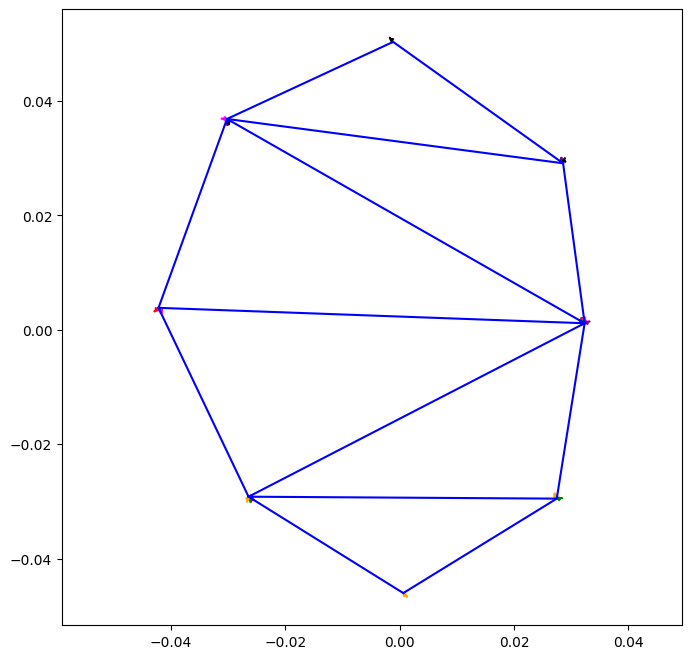

In [23]:
draw_halfedge_structure(he,mesh)

In [24]:
def apex_surroundings_basic(point, points, connections):
    surrounding = []
    for i,j in connections:
        if i == point:
            if j not in surrounding:
                surrounding.append(j)
            for a,b in connections:
                if a == j and b != point and b not in surrounding:
                    surrounding.append(b)
                elif b == j and a != point and a not in surrounding:
                    surrounding.append(a)
        elif j == point:
            if i not in surrounding:
                surrounding.append(i)
            for a,b in connections:
                if a == i and b != point and b not in surrounding:
                    surrounding.append(b)
                elif b == i and a != point and a not in surrounding:
                    surrounding.append(a)
    return surrounding

In [25]:
sur = apex_surroundings_basic(0, p, con)
print(sur)
po = [p[sur[i]] for i in range(len(sur))]
print(po)

[1, 6, 2, 7]
[(-0.03018346909553775, 0.03686325400483377), (0.03235685348510742, 0.001140214789147484), (-0.042159275547150654, 0.0038362932205200373), (0.028586692194784838, 0.02911202851463769)]


In [26]:
import copy

def triangle_surroundings_basic(tri_id, triangles):
    triangle = triangles[tri_id]
    surrounding = []
    for i,(t1,t2,t3) in enumerate(triangles):
        if i != tri_id and (t1 in triangle or t2 in triangle or t3 in triangle):
            if i not in surrounding:
                surrounding.append(i)
    res = copy.copy(surrounding)
    for j in surrounding:
        temp_triangle = triangles[j]
        for k,(t1,t2,t3) in enumerate(triangles):
            if k != tri_id and (t1 in temp_triangle or t2 in temp_triangle or t3 in temp_triangle):
                if k not in res:
                    res.append(k)
    return surrounding, res

In [27]:
tri = triangle_surroundings_basic(0,t)
print(tri)

([1, 2, 3, 4], [1, 2, 3, 4, 5])


In [28]:
def point_in(triangle,point):
    x, y = point
    x1, y1 = triangle[0]
    x2, y2 = triangle[1]
    x3, y3 = triangle[2]

    alpha = ((y2 - y3)*(x - x3) + (x3 - x2)*(y - y3)) / ((y2 - y3)*(x1 - x3) + (x3 - x2)*(y1 - y3))
    beta = ((y3 - y1)*(x - x3) + (x1 - x3)*(y - y3)) / ((y2 - y3)*(x1 - x3) + (x3 - x2)*(y1 - y3))
    gamma = 1 - alpha - beta

    return alpha >= 0 and beta >= 0 and gamma >= 0 and alpha + beta + gamma == 1

def find_triangle_basic(triangles,points,point,start_triangle):
    triangle = [points[triangles[start_triangle][0]],points[triangles[start_triangle][1]],points[triangles[start_triangle][2]]]
    stack = [(triangle,start_triangle)]
    visited = [start_triangle]
    while stack:
        t, t_id = stack.pop(-1)
        if point_in(t,point):
            return t_id
        surrounding = triangle_surroundings_basic(t_id,triangles)[0]
        visited += [t_id]
        for s in surrounding:
            if s not in visited:
                stack.append(([points[triangles[s][0]],points[triangles[s][1]],points[triangles[s][2]]],s))
            

    

In [29]:
res = find_triangle_basic(t,p,(13,5),0)
print(res)

None


In [30]:
def apex_surroundings_halfedges(p,halfedges):
    def surr(p,halfedges):
        nonlocal p1
        surrounding = set()
        p_halfedges = []
        for halfedge in halfedges:
            if halfedge.vertex.index == p:
                p_halfedges.append(halfedge)
        while p_halfedges:
            he = p_halfedges.pop()
            if he.next.vertex.index != p1:
                surrounding.add(he.next.vertex.index)
            if he.prev.vertex.index != p1:
                surrounding.add(he.prev.vertex.index)
        return surrounding
    p1 = p
    s = list(surr(p,halfedges))
    s1 = copy.copy(s)
    for s_point in s1:
        s += surr(s_point,halfedges)
    return list(set(s))

In [31]:
sur = apex_surroundings_halfedges(2, he)
print(sur)
po = [p[sur[i]] for i in range(len(sur))]
print(po)

[0, 1, 3, 4, 5, 6, 7]
[(-0.0011310497406990389, 0.05034364616169651), (-0.03018346909553775, 0.03686325400483377), (-0.02641330780521517, -0.029190667563793703), (0.0006431438076880541, -0.046041157759872144), (0.027477821227042898, -0.029527677367715277), (0.03235685348510742, 0.001140214789147484), (0.028586692194784838, 0.02911202851463769)]


In [32]:
def triangle_surroundings_halfedge(tri_id, halfedges):
    def surr(tri_id,halfedges):
        nonlocal tri_id1
        he = None
        for h in halfedges:
            if h.face.index == tri_id:
                he = h
                break
        surrounding = []
        if he.twin != None and he.twin.face.index != tri_id1:
            surrounding.append(he.twin.face.index)
        he = he.next
        if he.twin != None and he.twin.face.index != tri_id1:
            surrounding.append(he.twin.face.index)
        he = he.next
        if he.twin != None and he.twin.face.index != tri_id1:
            surrounding.append(he.twin.face.index)
        he = he.next
        return surrounding 
    tri_id1 = tri_id
    surrounding = surr(tri_id,halfedges)
    s1 = copy.copy(surrounding)
    for face in s1:
        surrounding += surr(face,halfedges)
    return list(set(surrounding))

In [33]:
tri = triangle_surroundings_halfedge(3,he)
print(tri)

[0, 2]


In [34]:
def find_triangle_halfedge(halfedges,point,start_triangle):
    def surr(he):
        surrounding = []
        if he.twin != None:
            surrounding.append(he.twin)
        he = he.next
        if he.twin != None:
            surrounding.append(he.twin)
        he = he.next
        if he.twin != None:
            surrounding.append(he.twin)
        return surrounding
    he = None
    for h in halfedges:
        if h.face.index == start_triangle:
            he = h
            break
    triangle = [he.vertex.cords,he.next.vertex.cords,he.prev.vertex.cords]
    tri_ind = he.face.index
    stack = [(triangle,tri_ind,he)]
    visited = [tri_ind]
    while stack:
        t,t_ind,halfedge = stack.pop(-1)
        if point_in(t,point):
            return t_ind
        surrounding = surr(halfedge)
        for h in surrounding:
            new_tri = [h.vertex.cords,h.next.vertex.cords,h.prev.vertex.cords]
            new_tri_ind = h.face.index
            if new_tri_ind not in visited:
                stack.append((new_tri,new_tri_ind,h))
                visited.append(new_tri_ind)


In [35]:
res = find_triangle_halfedge(he,(13,5),4)
print(res)

None


In [38]:
import timeit

def time_tests():
    for i in range(12):
        p,t = triangulation_reader(str(i + 1))
        con = triangles_to_connections(t)
        
        mesh = triangles_to_segments(p,t)
        he = create_half_edge_structure(p, t)

        print("Test", i+1)
        
        print("Czas trwania basic")
        op1 = timeit.timeit('apex_surroundings_basic(0,p,con)', globals=globals(), number=1)
        print("OP1: ",op1)

        op2 = timeit.timeit('triangle_surroundings_basic(0,t)', globals=globals(), number=1)
        print("OP2: ",op2)

        op3 = timeit.timeit('find_triangle_basic(t,p,(1.5,1.5),0)', globals=globals(), number=1)
        print("OP3: ",op3)

        print("Czas trwania halfedges")
        op1_he = timeit.timeit('apex_surroundings_halfedges(0,he)', globals=globals(), number=1)
        print("OP1: ",op1_he)

        op2_he = timeit.timeit('triangle_surroundings_halfedge(0,he)', globals=globals(), number=1)
        print("OP2: ",op2_he)

        op3_he = timeit.timeit('find_triangle_halfedge(he,(1.5,1.5),0)', globals=globals(), number=1)
        print("OP3: ",op3_he)

In [39]:
time_tests()

Test 1
Czas trwania basic
OP1:  2.1414000002550893e-05
OP2:  4.295500002626795e-05
OP3:  0.00021716199989896268
Czas trwania halfedges
OP1:  4.4795999656344065e-05
OP2:  2.020800002355827e-05
OP3:  4.557599959298386e-05
Test 2
Czas trwania basic
OP1:  1.2161999620730057e-05
OP2:  2.1192000076553086e-05
OP3:  0.00016453600028398796
Czas trwania halfedges
OP1:  3.7493000036192825e-05
OP2:  1.8152999928133795e-05
OP3:  4.619899982571951e-05
Test 3
Czas trwania basic
OP1:  1.3363000107347034e-05
OP2:  2.2807999812357593e-05
OP3:  0.0001608459997441969
Czas trwania halfedges
OP1:  3.5011999898415525e-05
OP2:  1.6925000181799987e-05
OP3:  3.935099994123448e-05
Test 4
Czas trwania basic
OP1:  1.017199974739924e-05
OP2:  1.7567999748280272e-05
OP3:  0.00015321000000767526
Czas trwania halfedges
OP1:  2.7189999855181668e-05
OP2:  1.4320999980554916e-05
OP3:  3.8070000300649554e-05
Test 5
Czas trwania basic
OP1:  1.4272000044002198e-05
OP2:  3.175100027874578e-05
OP3:  0.00028942700009793043
Cza